In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#device = torch.device("cuda:0")
device = torch.device("cpu")

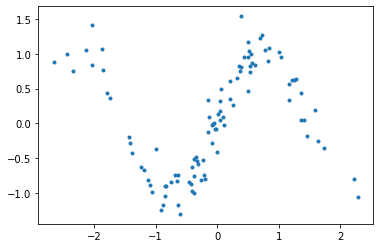

In [3]:
# Let us generate data
def get_data():
    np.random.seed(2)
    x = np.random.randn(100, 1)
    x = np.sort(x, axis=0)

    targets = np.sin(x * 2 * np.pi / 3)
    targets = targets + 0.2 * np.random.randn(*targets.shape)

    # Convert to PyTorch tensors
    x = torch.FloatTensor(x)
    targets = torch.FloatTensor(targets)
    
    return x, targets

x, targets = get_data()
# Plot the data
fig, ax = plt.subplots(1)
ax.plot(x, targets, '.')

In [4]:
class MLP(nn.Module):
    def __init__(self, n_inputs=1):
        super(MLP, self).__init__()
        self.input = nn.Linear(n_inputs, 10)
        self.hidden1 = nn.Linear(10, 11)
        self.hidden2 = nn.Linear(11, 1)
        self.tanh = nn.Tanh()
        self.tanh2 = nn.Tanh()

    def forward(self, x):
        """
        Args:
          x of shape (n_samples, n_inputs): Model inputs.
        
        Returns:
          y of shape (n_samples, 1): Model outputs.
        """
        # YOUR CODE HERE
        x = self.input(x)
        x = self.tanh(x)
        x = self.hidden1(x)
        x = self.tanh2(x)
        x = self.hidden2(x)
        return x
        

In [5]:
# Let us create the network and make sure it can process a random input of the right shape
def test_MLP_shapes():
    n_inputs = 1
    n_samples = 10
    net = MLP()
    y = net(torch.randn(n_samples, n_inputs))
    assert y.shape == torch.Size([n_samples, 1]), f"Bad y.shape={y.shape}"
    print('Success')

test_MLP_shapes()

Success


In [6]:
# Create the model
model = MLP()
model.to(device)

MLP(
  (input): Linear(in_features=1, out_features=10, bias=True)
  (hidden1): Linear(in_features=10, out_features=11, bias=True)
  (hidden2): Linear(in_features=11, out_features=1, bias=True)
  (tanh): Tanh()
  (tanh2): Tanh()
)

In [8]:
# The training loop here
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
total_loss = 0.0
    
for i in range(200):
    optimizer.zero_grad()
    outputs = model(x)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
    print('Loss: {:.2f}, Total Loss: {:.2f}'.format(loss, total_loss))
    

Loss: 0.63, Total Loss: 0.63
Loss: 0.58, Total Loss: 1.22
Loss: 0.55, Total Loss: 1.76
Loss: 0.53, Total Loss: 2.29
Loss: 0.52, Total Loss: 2.81
Loss: 0.51, Total Loss: 3.32
Loss: 0.51, Total Loss: 3.83
Loss: 0.50, Total Loss: 4.33
Loss: 0.50, Total Loss: 4.83
Loss: 0.49, Total Loss: 5.32
Loss: 0.49, Total Loss: 5.81
Loss: 0.49, Total Loss: 6.30
Loss: 0.48, Total Loss: 6.78
Loss: 0.48, Total Loss: 7.26
Loss: 0.47, Total Loss: 7.73
Loss: 0.46, Total Loss: 8.19
Loss: 0.46, Total Loss: 8.64
Loss: 0.45, Total Loss: 9.09
Loss: 0.44, Total Loss: 9.53
Loss: 0.44, Total Loss: 9.97
Loss: 0.43, Total Loss: 10.41
Loss: 0.43, Total Loss: 10.84
Loss: 0.42, Total Loss: 11.26
Loss: 0.42, Total Loss: 11.68
Loss: 0.41, Total Loss: 12.09
Loss: 0.40, Total Loss: 12.49
Loss: 0.40, Total Loss: 12.88
Loss: 0.39, Total Loss: 13.27
Loss: 0.38, Total Loss: 13.65
Loss: 0.37, Total Loss: 14.03
Loss: 0.36, Total Loss: 14.39
Loss: 0.36, Total Loss: 14.75
Loss: 0.35, Total Loss: 15.10
Loss: 0.34, Total Loss: 15.43


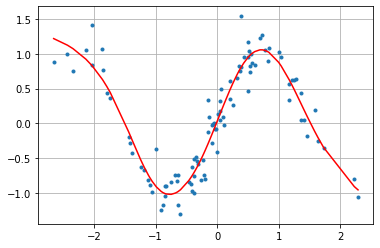

In [11]:
# Plot the trained MLP
with torch.no_grad():
    fig, ax = plt.subplots(1)
    ax.plot(x, targets, '.')
    y = model(x)
    ax.plot(x, y.numpy(), 'r-')
    ax.grid(True)